# Статистический анализ данных сервиса аренды самокатов

# Цель проекта

*В данном исследовании рассмотрим данные, полученные от сервиса аренды самокатов GoFast. Проанализируем данные о пользователях из разных городов и их поездках, составим и проверим гипотезы, которые могут помочь бизнесу вырасти.*

*Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:*

без подписки:
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;

с подпиской Ultra
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

*Цель работы состоит в изучении данных по пользователям сервиса аренды самокатов и поиске гипотез, которые помогут бизнесу лучше понимать своих клиентов. Также, одной из главных целей проекта является закрепление знаний, связанных со статистическом анализом.* 

*Мы рассмотрим три разных файла с данными о пользователях, выполним предобработку данных и исследовательский анализ. Изучим  такие фактора как: возраст пользователей; расстояние, которое пользователь преодолел за одну поездку; продолжительность поездок.*

*Проанализируем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц, а также добавим данные по помесячной выручке, которую принёс каждый пользователь.*

*Затем приступим к рассмотрению и анализу следующих гипотез:*

* Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.

* Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

* Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.




In [2]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy import stats 
import os

pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None
sns.set_theme(style='darkgrid')
pd.set_option('display.float_format', '{:,.2f}'.format)

#### Шаг 1. Загрузка данных

In [3]:
# Загружаем данные из файлов в датафремы
pth1 = ('/datasets/users_go.csv')
pth2 = ('/datasets/rides_go.csv')
pth3 = ('/datasets/subscriptions_go.csv')

pth1_local = (r'datasets\users_go.csv')
pth2_local = (r'datasets\rides_go.csv')
pth3_local = (r'datasets\subscriptions_go.csv')

# Проверяем наличие файла по набранному пути
if os.path.exists(pth1_local) and os.path.exists(pth2_local) and os.path.exists(pth3_local):
    # Считываем файл, задаем разделитель и переводим даты в нужный формат
    users = pd.read_csv(pth1_local)
    rides = pd.read_csv(pth2_local, parse_dates=['date'], dayfirst=True)
    subs = pd.read_csv(pth3_local)
elif os.path.exists(pth_cloud):
    users = pd.read_csv(pth1)
    rides = pd.read_csv(pth2, parse_dates=['date'], dayfirst=True)
    subs = pd.read_csv(pth3)
else:
    print('Проверьте правильность написания пути к файлам или их доступность по указанному адресу')

In [4]:
# Составляем список датафреймов и их имен
dfs = [users,rides,subs]
name_dfs = ['users','rides','subs']

In [5]:
# Функция для отображения информации по df
def data_view(df, df_name=''):
    #print(f'\033[1mПервые строки датафрейма\033[0m:\n {df.head()}\n')
    print(f'\033[1mПервые строки датафрейма\033[0m:\n {df.head()}\n')
    print(df.info())
    print('\n\n\n')
    

In [6]:
# Цикл для отображения первых пяти строк и общей информации по датафреймам
i = 0

for df in dfs:
    print(f'\033[1mДатафрейм {name_dfs[i].upper()}\033[0m')
    data_view(df)
    i += 1

Датафрейм USERS
Первые строки датафрейма:
    user_id        name  age            city subscription_type
0        1        Кира   22          Тюмень             ultra
1        2   Станислав   31            Омск             ultra
2        3     Алексей   20          Москва             ultra
3        4  Константин   26  Ростов-на-Дону             ultra
4        5       Адель   28            Омск             ultra

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None




Датафрейм RIDES
Первые строки датафрейма:
    user_id  distance  duration        date
0  

##### Вывод по загрузке данных

Загрузили данные, создали датафреймы и просмотрели необходимую информацию, которую будем использовать в проекте. Рассмотрели размер датафреймов, типы данных. Пока что не обнаружили никаких существенных проблем за исключением неправильного типа данных в столбце date датафрейма *rides*. Переходим к предобработке данных.

Получили три датафрейма со следующими параметрами:

***Users:***

|Название столбца | Описание значений
:-------------|:-------|
user_id	| уникальный идентификатор пользователя
name | имя пользователя
age | возраст
city | город
subscription_type | тип подписки (free, ultra)

***Rides:***

Название столбца | Описание значений
:-------------|:-------
user_id	| уникальный идентификатор пользователя
distance | расстояние, которое пользователь проехал в текущей сессии (в метрах)
duration | продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
date | дата совершения поездки

***Subs:***

Название столбца | Описание значений
:-------------|:-------
subscription_type | тип подписки
minute_price | стоимость одной минуты поездки по данной подписке
start_ride_price | стоимость начала поездки
subscription_fee | стоимость ежемесячного платежа

#### Шаг 2. Предобработка данных

 В этом разделе проанализируем количество пропущенных значений в данных, наличие и количество дубликатов, приведем форматы столбцов к нужному виду.

In [11]:
# Функция, которая выдает размер датафрейма
def dfs_size(dfs):
    i = 0
    for df in dfs:    
        print(f'Размер датафрейма {name_dfs[i].upper()}: строк - {df.shape[0]}, столбцов - {df.shape[1]}')
        i += 1

In [12]:
dfs_size(dfs)

Размер датафрейма USERS: строк - 1565, столбцов - 5
Размер датафрейма RIDES: строк - 18068, столбцов - 4
Размер датафрейма SUBS: строк - 2, столбцов - 4


##### Изменение типов данных и добавление нового столбца

In [13]:
rides.head()

,user_id,distance,duration,date
0,1,"4,409.92",25.60,2021-01-01
1,1,"2,617.59",15.82,2021-01-18
2,1,754.16,6.23,2021-04-20
3,1,"2,694.78",18.51,2021-08-11
4,1,"4,028.69",26.27,2021-08-28


In [14]:
# Преобразуем дату в формат datetime
#rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
#rides.dtypes

In [15]:
# Добавляем новый столбец с месяцем поездки
rides['month'] = rides['date'].dt.month
rides

,user_id,distance,duration,date,month
0,1,"4,409.92",25.60,2021-01-01,1
1,1,"2,617.59",15.82,2021-01-18,1
2,1,754.16,6.23,2021-04-20,4
3,1,"2,694.78",18.51,2021-08-11,8
4,1,"4,028.69",26.27,2021-08-28,8
...,...,...,...,...,...
18063,1534,"3,781.10",19.82,2021-11-04,11
18064,1534,"2,840.42",21.41,2021-11-16,11
18065,1534,"3,826.19",18.44,2021-11-18,11
18066,1534,"2,902.31",16.67,2021-11-27,11


In [16]:
max = rides['date'].min()
min = rides['date'].max()
print(f'Временной период за который мы рассматриваем данные: {max.date()} - {min.date()}')

Временной период за который мы рассматриваем данные: 2021-01-01 - 2021-12-30


In [17]:
# Проверяем размеры датафреймов
dfs_size(dfs)

Размер датафрейма USERS: строк - 1565, столбцов - 5
Размер датафрейма RIDES: строк - 18068, столбцов - 5
Размер датафрейма SUBS: строк - 2, столбцов - 4


##### Изучение пропусков в датафреймах

*Для наглядности составим таблицу, которая будет включать три столбца: кол-во пропущенных значений, процент Nan значений и тип данных, по каждому из столбцов датасета.*

In [18]:
# Пишем функцию для отображения кол-ва, процента пропущенных значений и типа данных
def numb_isna(df):
    isna_types = pd.concat([df.isna().sum(),(df.isna().sum() / df.isna().count() * 100).round(2),
                            df.dtypes],axis=1)
    isna_types.columns = ['sum_isna','percent_isna','value_type']
    isna_types.sort_values(by='sum_isna', ascending=False)
    return isna_types

# Выводим таблицу для каждого датафрейма выводим таблицу
j = 0
for df in dfs:
    print(f'\033[1m{name_dfs[j].upper()}\033[0m')
    print(f'{numb_isna(df)}\n')
    j += 1

USERS
                   sum_isna  percent_isna value_type
user_id                   0          0.00      int64
name                      0          0.00     object
age                       0          0.00      int64
city                      0          0.00     object
subscription_type         0          0.00     object

RIDES
          sum_isna  percent_isna      value_type
user_id          0          0.00           int64
distance         0          0.00         float64
duration         0          0.00         float64
date             0          0.00  datetime64[ns]
month            0          0.00           int64

SUBS
                   sum_isna  percent_isna value_type
subscription_type         0          0.00     object
minute_price              0          0.00      int64
start_ride_price          0          0.00      int64
subscription_fee          0          0.00      int64



Видим, что в наших датафреймах отствуют пропущенные значения

In [19]:
dfs_size(dfs)

Размер датафрейма USERS: строк - 1565, столбцов - 5
Размер датафрейма RIDES: строк - 18068, столбцов - 5
Размер датафрейма SUBS: строк - 2, столбцов - 4


##### Изучение дубликатов в датафреймах

In [20]:
# Смотрим наличие пропусков в датафреймах
i = 0
for df in dfs:
    print(f'\033[1m{name_dfs[i].upper()}\033[0m: {df.duplicated().sum()}')
    i += 1

USERS: 31
RIDES: 0
SUBS: 0


In [21]:
users[users.duplicated()]

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


In [22]:
print(f'Дубликаты в датафрейме users: {(users.duplicated().sum() / users.duplicated().count() * 100).round(2)}%')

Дубликаты в датафрейме users: 1.98%


In [23]:
# Удаляем дубликаты в users
users = users.drop_duplicates().reset_index(drop=True)

In [24]:
# Смотрим количество уникальных значений по каждому столбцу в датафреймах
dfs = [users,rides,subs]
i = 0 
for df in dfs:
    print(f'\033[1m{name_dfs[i].upper()}:\n\033[0m{df.nunique()}\n')
    i += 1

USERS:
user_id              1534
name                  194
age                    29
city                    8
subscription_type       2
dtype: int64

RIDES:
user_id      1534
distance    18068
duration    17974
date          364
month          12
dtype: int64

SUBS:
subscription_type    2
minute_price         2
start_ride_price     2
subscription_fee     2
dtype: int64



In [25]:
# Смотрим уникальные значения по столбцам датафреймов, 
# с целью выявления неявных дубликатов и ошибок, возможных при вводе данных

i = 0
for df in dfs:
    print(f'\033[1m{name_dfs[i].upper()}\033[0m:')
    i += 1
    for col in df.columns:
        print(f'{df[col].name}:\n {df[col].unique()}\n')
    

USERS:
user_id:
 [   1    2    3 ... 1532 1533 1534]

name:
 ['Кира' 'Станислав' 'Алексей' 'Константин' 'Адель' 'Регина' 'Игорь' 'Юрий'
 'Ян' 'Валерий' 'Агата' 'Марк' 'Ева' 'Антонина' 'Валерия' 'Амалия'
 'Даниил' 'Аделина' 'Святогор' 'Борис' 'Вероника' 'Ростислав' 'Назар'
 'Эдуард' 'Василий' 'Денис' 'Тамара' 'Николай' 'Эвелина' 'Федор' 'Руслан'
 'Иван' 'Любовь' 'Ярослава' 'Майя' 'Ильдар' 'Данила' 'Нина' 'Стефания'
 'Ясмина' 'Дмитрий' 'Александр' 'Одиссей' 'Арсений' 'Алла' 'Таисия'
 'Максим' 'Юлиана' 'Павел' 'Карина' 'Алиса' 'Лидия' 'Рамиль' 'Родион'
 'Ника' 'Оксана' 'Анастасия' 'Маргарита' 'Вера' 'Тимур' 'Никита' 'Лев'
 'Влад' 'Артур' 'Анна' 'Ольга' 'Вячеслав' 'Ксения' 'Виталина' 'Владислав'
 'Тамерлан' 'Амина' 'Вадим' 'Олеся' 'Зарина' 'Егор' 'Гордей' 'Лилия'
 'Святослав' 'Роберт' 'Амир' 'Влада' 'Богдан' 'Полина' 'Марат' 'Елисей'
 'Макар' 'Алина' 'Глеб' 'Андрей' 'Альбина' 'Людмила' 'Марсель' 'Милена'
 'Диана' 'Дарина' 'Данил' 'Артемий' 'Лиана' 'Альберт' 'Герман' 'Жанна'
 'Нелли' 'Евген

In [26]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


In [27]:
# Размеры датафреймов после предобработки
dfs_size(dfs)

Размер датафрейма USERS: строк - 1534, столбцов - 5
Размер датафрейма RIDES: строк - 18068, столбцов - 5
Размер датафрейма SUBS: строк - 2, столбцов - 4


##### Вывод по предобработке данных

В этом разделе проекта, мы проверили типы данных столбцов в датафреймах. В датафрейме *rides*, изменили тип данных даты на datetime, для более удобного анализа, а также выделили из даты столбец с номером месяца, в котором была произведена поездка. 

Далее, мы просмотрели датафреймы на наличие пропущенных значений, вывели таблицу с NaN значениями для каждого столбца датафреймов, на удивление, нам попались хорошо сложенные данные, поэтому предобработка в этой части не потребовалась. 

Заключительным этапом была проверка данных на дубликаты, мы нашли некоторое количество явных дубликатов в датафрейме USERS, которые составили около 2% и удалили их из данных, также просмотрели данные на наличие неявных дубликатов.

#### Шаг 3. Исследовательский анализ данных

In [28]:
# Выводим общую информацию по датафрейму
users.describe()

,user_id,age
count,"1,534.00","1,534.00"
mean,767.50,24.90
std,442.97,4.57
min,1.00,12.00
25%,384.25,22.00
50%,767.50,25.00
75%,"1,150.75",28.00
max,"1,534.00",43.00


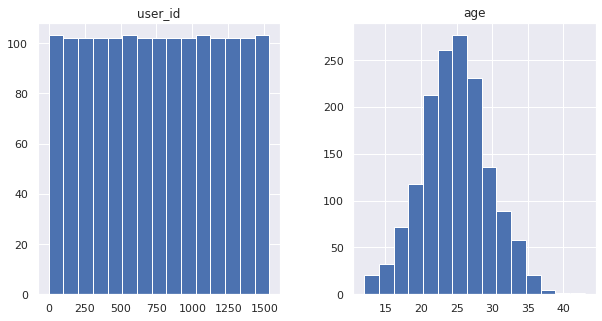

In [29]:
# Посмотрим на вид распределений для численных значений датафреймов
users.hist(figsize=(10, 5), bins=15);

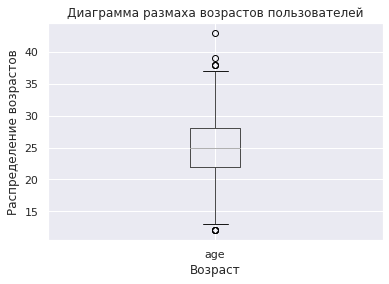

In [30]:
# Строим диаграммы рассеяния для указанных в названии величин
users.boxplot('age').set(title = 'Диаграмма размаха возрастов пользователей',
                         xlabel='Возраст', ylabel = 'Распределение возрастов');

In [31]:
rides.describe()

,user_id,distance,duration,month
count,"18,068.00","18,068.00","18,068.00","18,068.00"
mean,842.87,"3,070.66",17.81,6.49
std,434.73,"1,116.83",6.09,3.44
min,1.00,0.86,0.50,1.00
25%,487.00,"2,543.23",13.60,4.00
50%,889.00,"3,133.61",17.68,6.00
75%,"1,213.25","3,776.22",21.72,9.00
max,"1,534.00","7,211.01",40.82,12.00


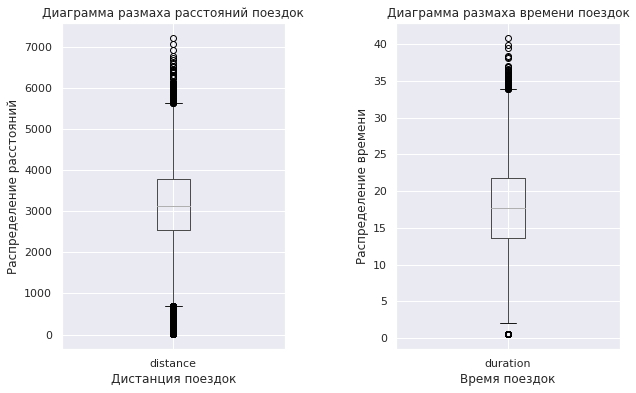

In [32]:
# Задаем размер и количество графиков
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Строим диаграммы рассеяния для указанных в названии величин
rides.boxplot('distance', ax=ax[0]).set(title = 'Диаграмма размаха расстояний поездок',
                                        xlabel='Дистанция поездок', ylabel = 'Распределение расстояний')
rides.boxplot('duration', ax=ax[1]).set(title = 'Диаграмма размаха времени поездок',
                                        xlabel='Время поездок', ylabel = 'Распределение времени')

plt.subplots_adjust(wspace=0.5) 
plt.show()

In [33]:
rides['month'].value_counts().sort_values(ascending=False)

1     1585
5     1560
6     1553
3     1544
7     1529
12    1527
8     1518
9     1517
4     1506
10    1475
11    1418
2     1336
Name: month, dtype: int64

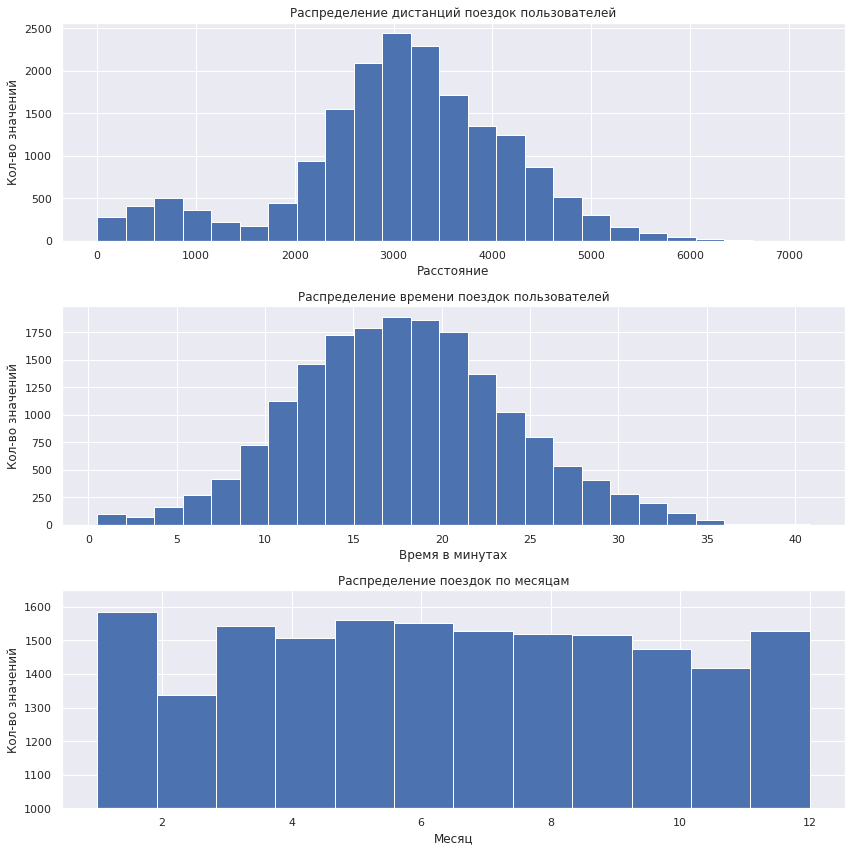

In [34]:
#rides.hist(figsize=(15, 10),bins=24);
# Строим гистограммы для каждого столбца
fig, axs = plt.subplots(3, 1, figsize=(12, 12))  # Общий размер для всех графиков

rides['distance'].plot(kind='hist', ax=axs[0],bins=25)
axs[0].set_title('Распределение дистанций поездок пользователей',fontsize=12)
axs[0].set_ylabel('Кол-во значений')
axs[0].set_xlabel('Расстояние')

rides['duration'].plot(kind='hist', ax=axs[1],bins=25)
axs[1].set_title('Распределение времени поездок пользователей',fontsize=12)
axs[1].set_ylabel('Кол-во значений')
axs[1].set_xlabel('Время в минутах')

rides['month'].plot(kind='hist', ax=axs[2],bins=12,ylim = (1000,1650))
axs[2].set_title('Распределение поездок по месяцам',fontsize=12)
axs[2].set_ylabel('Кол-во значений')
axs[2].set_xlabel('Месяц')

plt.tight_layout()
plt.show()

##### Частота встречаемости городов

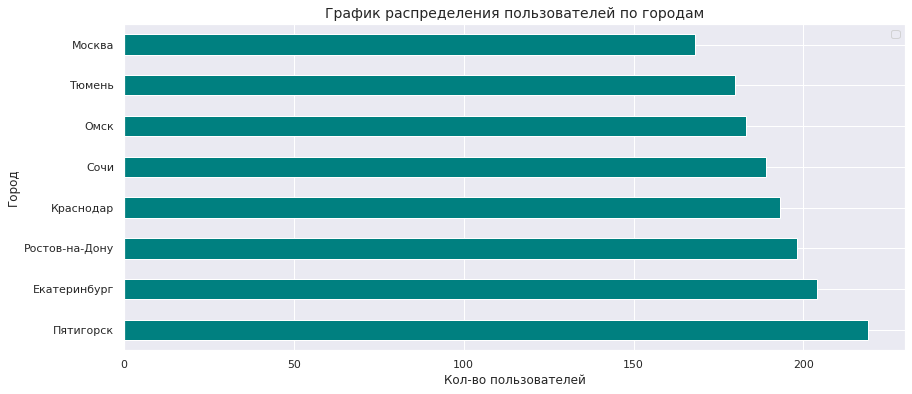

In [35]:
# Составляем сводную таблицу, сортируем по убыванию и строим график по количеству пользователей в городах
(
    users
    .pivot_table(index='city', values='user_id', aggfunc='count')
    .sort_values(by='user_id', ascending=False).plot(kind='barh',figsize=(14,6),color='teal')
)

plt.title('График распределения пользователей по городам', fontsize = 14)
plt.xlabel('Кол-во пользователей', fontsize = 12)
plt.ylabel('Город', fontsize = 12)
plt.legend('')
plt.show();

*По построенному графику видим, что в датафрейме присутствуют пользователи из 8 городов, больше всего пользователей за этот период было в Пятигорске, также в топ 3 вошли Екатеринбург и Ростов-на-Дону, наименьшее кол-во уникальных пользователей зафиксировано в Москве.*

In [36]:
#(users.loc[users['city'] == 'Москва', 'city'].count() / len(users['city']) * 100).round(2)
print('Процент пользователей сервиса каждого города относительно общего количества клиентов:\n')
for city in users['city'].unique():
    percent = users.loc[users['city'] == city, 'city'].count() / len(users['city']) * 100
    print(f'{city.title()} - {percent.round(2)}%')

Процент пользователей сервиса каждого города относительно общего количества клиентов:

Тюмень - 11.73%
Омск - 11.93%
Москва - 10.95%
Ростов-На-Дону - 12.91%
Краснодар - 12.58%
Пятигорск - 14.28%
Екатеринбург - 13.3%
Сочи - 12.32%


Можно сказать, что в процентом отношении количество пользователей в городах различается не сильно.

##### Соотношение пользователей с подпиской и без подписки

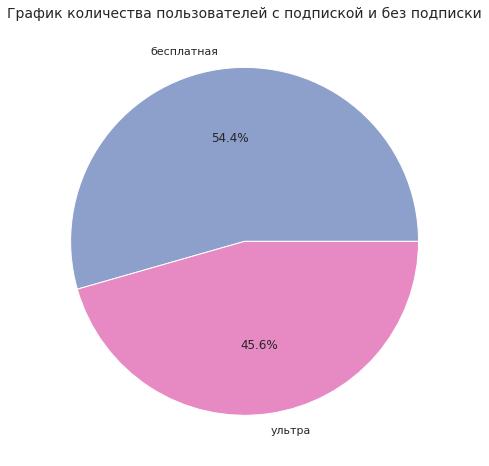

In [37]:
# Создаем новую сводную таблицу
users_subs = users.pivot_table(index='subscription_type', values='user_id', aggfunc='count')
users_subs.columns = ['users']

# Задаем размер и цвет диаграммы
plt.figure(figsize=(8, 8))

colors = sns.color_palette('Set2')[2:4]
# Строим круговую диаграмму для пользователей исходя из подписки
plt.pie(users_subs['users'], labels=['бесплатная','ультра'], colors=colors, autopct='%1.1f%%')
plt.title('График количества пользователей с подпиской и без подписки', fontsize = 14)
plt.show();

In [38]:
# Выделяем нужных пользователей и считаем их долю относительно общего количества
users_free = (users.loc[users['subscription_type'] == 'free','subscription_type'].count() / 
              users['subscription_type'].count() * 100)
users_ultra = (users.loc[users['subscription_type'] == 'ultra','subscription_type'].count() / 
               users['subscription_type'].count() * 100)
print(f'Доля пользователей с подпиской ультра: {users_ultra.round(1)}%, с бесплатной подпиской: {users_free.round(1)}%')

Доля пользователей с подпиской ультра: 45.6%, с бесплатной подпиской: 54.4%


*Согласно проилюстрированным данным, можно заметить, что большая часть пользователей использует бесплатную подписку, но разница не так велика, 45.6% пользователей имеет подписку "ультра".*

##### Возраст пользователей

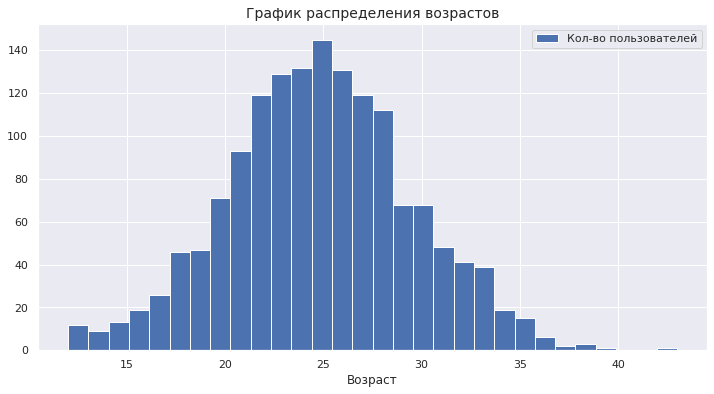

In [39]:
users['age'].hist(bins=30,figsize=(12,6))

plt.title('График распределения возрастов', fontsize = 14)
plt.ylabel('', fontsize = 12)
plt.xlabel('Возраст', fontsize = 12)
plt.legend(['Кол-во пользователей'], loc=0)
plt.xticks(rotation=0)
plt.show();

In [40]:
users['age'].describe()

count   1,534.00
mean       24.90
std         4.57
min        12.00
25%        22.00
50%        25.00
75%        28.00
max        43.00
Name: age, dtype: float64

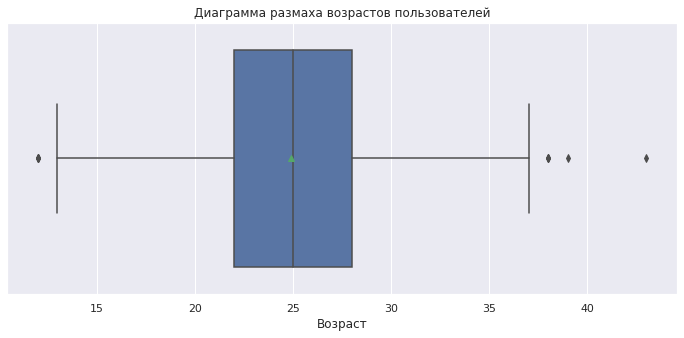

In [41]:
plt.figure(figsize=(12, 5))
ax = sns.boxplot(x=users['age'],showmeans=True)
ax.set_title('Диаграмма размаха возрастов пользователей')
ax.set_xlabel('Возраст');

*Просмотрев данные по возрастам пользователей, мы можем сказать, что чаще всего сервисом пользуются молодые люди, их средний возраст составляет 25 лет. Распределение возрастов имеет вид нормального распределения. Самым молодым пользователем сервиса был ребенок 12 лет, а самым старшим - 45 лет.*

##### Расстояние преодоленное пользователями

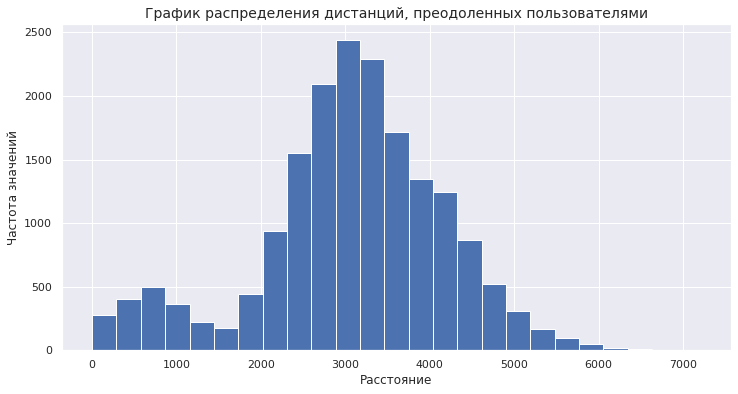

In [42]:
rides['distance'].hist(bins=25, figsize=(12,6))

plt.title('График распределения дистанций, преодоленных пользователями', fontsize = 14)
plt.ylabel('Частота значений', fontsize = 12)
plt.xlabel('Расстояние', fontsize = 12)
plt.show();

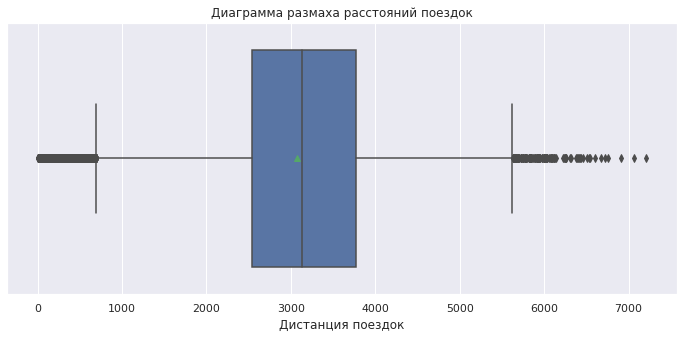

In [43]:
plt.figure(figsize=(12, 5))

ax = sns.boxplot(x=rides['distance'],showmeans=True)
ax.set_title('Диаграмма размаха расстояний поездок')
ax.set_xlabel('Дистанция поездок');

In [44]:
rides['distance'].describe()

count   18,068.00
mean     3,070.66
std      1,116.83
min          0.86
25%      2,543.23
50%      3,133.61
75%      3,776.22
max      7,211.01
Name: distance, dtype: float64

In [45]:
rides.query('distance < 5')

,user_id,distance,duration,date,month
9541,925,2.57,3.01,2021-10-19,10
11555,1069,0.86,10.00,2021-01-31,1
13690,1223,4.33,4.01,2021-05-22,5


*По итогам анализа, мы определили минимальное значение, составлявшее меньше одного метра, и максимальное в 7211 метров. Также по распределению можно заметить два выраженных пика: первый около 700 метров и более явный — около 3100 метров.*

##### Продолжительность поездок

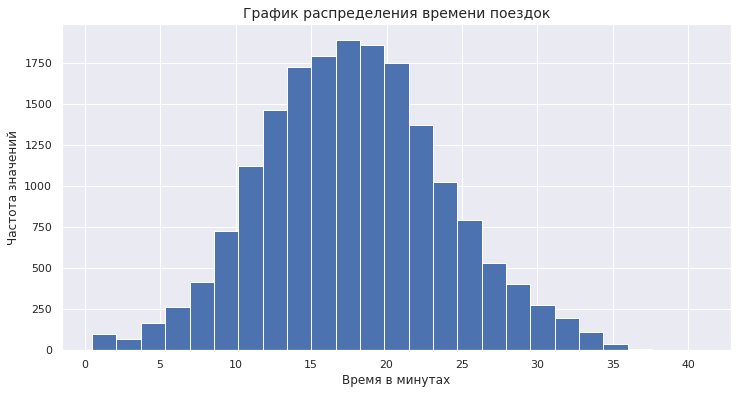

In [46]:
rides['duration'].hist(bins=25, figsize=(12,6))

plt.title('График распределения времени поездок', fontsize = 14)
plt.ylabel('Частота значений', fontsize = 12)
plt.xlabel('Время в минутах', fontsize = 12)
plt.xticks(rotation=0)
plt.show();

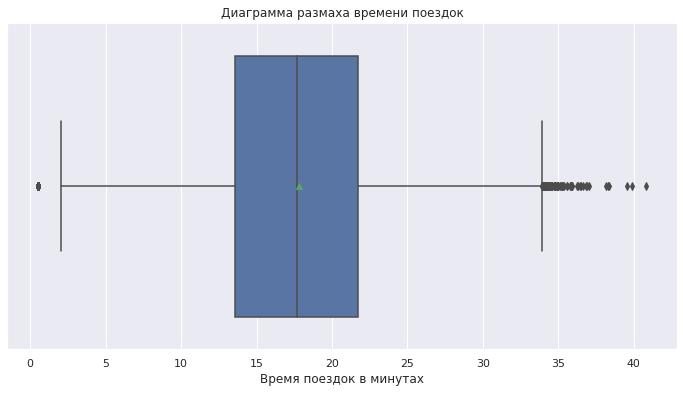

In [47]:
plt.figure(figsize=(12, 6))

ax = sns.boxplot(x=rides['duration'],showmeans=True)
ax.set_title('Диаграмма размаха времени поездок')
ax.set_xlabel('Время поездок в минутах');

In [48]:
rides['duration'].describe()

count   18,068.00
mean        17.81
std          6.09
min          0.50
25%         13.60
50%         17.68
75%         21.72
max         40.82
Name: duration, dtype: float64

In [49]:
# Рассмотриdftv внимательнее поездки с аномально маленьким временем равным половине минуты
rides.query('duration == 0.5')

,user_id,distance,duration,date,month
6531,701,"4,196.45",0.50,2021-08-31,8
6570,704,"4,830.82",0.50,2021-10-14,10
6680,712,"4,684.00",0.50,2021-03-04,3
6695,713,"5,215.64",0.50,2021-02-25,2
6768,718,"5,197.44",0.50,2021-02-11,2
...,...,...,...,...,...
17004,1460,"5,531.34",0.50,2021-01-19,1
17242,1477,"6,724.93",0.50,2021-01-12,1
17314,1483,"4,445.48",0.50,2021-03-06,3
17505,1496,"5,722.55",0.50,2021-02-14,2


In [50]:
# Отфильтровываем аномальные значения
rides = rides.query('not duration == 0.5')
rides

,user_id,distance,duration,date,month
0,1,"4,409.92",25.60,2021-01-01,1
1,1,"2,617.59",15.82,2021-01-18,1
2,1,754.16,6.23,2021-04-20,4
3,1,"2,694.78",18.51,2021-08-11,8
4,1,"4,028.69",26.27,2021-08-28,8
...,...,...,...,...,...
18063,1534,"3,781.10",19.82,2021-11-04,11
18064,1534,"2,840.42",21.41,2021-11-16,11
18065,1534,"3,826.19",18.44,2021-11-18,11
18066,1534,"2,902.31",16.67,2021-11-27,11


In [51]:
rides['duration'].describe()

count   17,973.00
mean        17.90
std          5.98
min          2.04
25%         13.67
50%         17.71
75%         21.75
max         40.82
Name: duration, dtype: float64

age = stats.iqr(users['age'])
dis = stats.iqr(rides['distance'])
dur = stats.iqr(rides['duration'])
age, dis, dur

*Проанализировав время поездок пользователей, мы можем сказать, что среднее время поездок находится в районе 17.7 минут, максимальное время поездок около 40 минут. Что касается минимального времени, мы обнаружили аномальное значене равное 30 секундам, которое было зафиксировано у 95 записей поездок и отфильтровали его, посчитав явным выбросом.*

In [52]:
for col in [users['age'],rides['distance'],rides['duration']]:
    print(f'Межквартильный размах данных столбца: {stats.iqr(col).round(1)}')
    print(f'Квантили столбца:\n{col.quantile([.25, .5, .75])}\n')

Межквартильный размах данных столбца: 6.0
Квантили столбца:
0.25   22.00
0.50   25.00
0.75   28.00
Name: age, dtype: float64

Межквартильный размах данных столбца: 1223.8
Квантили столбца:
0.25   2,538.84
0.50   3,129.03
0.75   3,762.64
Name: distance, dtype: float64

Межквартильный размах данных столбца: 8.1
Квантили столбца:
0.25   13.67
0.50   17.71
0.75   21.75
Name: duration, dtype: float64



##### Вывод по исследовательскому анализу

В данном разделе мы провели исследовательский анализ различных данных в датафреймах. Узнали, что в датасете присутствуют данные по 8 городам России, больше всего сервисом пользовались пользователи, проживающие в Пятегорске, меньше всего - в Москве. Определили соотношение пользователей, которые пользуются бесплатной подпиской и подпиской "ультра", 54.4% против 45.6% соответсвенно.

Также, можно сказать, что в основном сервисом пользуются молодые люди, средний возраст которых составляет 25 лет. Возраст самого молодого пользователя - 12 лет, самого старшего - 45 лет.

Кроме того, мы исследовали расстояние и продолжительность поездок пользователей. Минимальное расстояние поездки составило около метра, а максимальное преодоленное расстояние пользователем — 7211 м, на построенной гистограмме заметили 2 явных пика, около 700 метров и более выраженный в районе 3100 метров, который и является средним значением датасета. Среднее и медианное значение времени поездок, как и в случае с расстоянием, очень близки, находятся в районе 17.7 минут, максимальное время поездки пользователя составило 40 минут. Что касается минимального времени, мы обнаружили аномальное значение, равное 30 секундам, которое было зафиксировано у 95 записей поездок, и отфильтровали его, посчитав явным выбросом.

Кроме того, мы построили и проанализировали диаграммы размаха данных по возрасту, расстоянию и времени поездок. По построенным диаграммам, можно судить о границах выбросов для этих данных, зафиксировать значения находящийся на 25, 50 и 75 квантилях, а также подчеркнуть достаточно близкие значения медиан и средних значений выборок. Несмотря на то, что в этих данных мы выявили некоторое количество выбросов, решили их не удалять, так как их количество не велико и не сильно влияет на вид распределений данных.

#### Шаг 4. Объединение данных

##### Объединение

In [53]:
# Объединяем все три датафрейма в один
merged_df = users.merge(rides, on='user_id', how='outer').merge(subs,on='subscription_type',how='outer')

In [54]:
# Проверяем количество уникальных значений
m = merged_df['user_id'].nunique()
u = users['user_id'].nunique()
r = rides['user_id'].nunique()

print(f'Число уникальных пользователей в объединенном датафрейме: {m}, в датафрейме users: {u} и rides: {r}.')

Число уникальных пользователей в объединенном датафрейме: 1534, в датафрейме users: 1534 и rides: 1534.


In [55]:
print(f'Размер таблиц до объединения {users.shape},{rides.shape} и {subs.shape}, \
размер объединенной таблицы: {merged_df.shape}.')

Размер таблиц до объединения (1534, 5),(17973, 5) и (2, 4), размер объединенной таблицы: (17973, 12).


In [56]:
merged_df

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,"4,409.92",25.60,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,"2,617.59",15.82,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,"2,694.78",18.51,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,"4,028.69",26.27,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
17968,1534,Альберт,25,Краснодар,free,"3,781.10",19.82,2021-11-04,11,8,50,0
17969,1534,Альберт,25,Краснодар,free,"2,840.42",21.41,2021-11-16,11,8,50,0
17970,1534,Альберт,25,Краснодар,free,"3,826.19",18.44,2021-11-18,11,8,50,0
17971,1534,Альберт,25,Краснодар,free,"2,902.31",16.67,2021-11-27,11,8,50,0


In [57]:
merged_df

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,"4,409.92",25.60,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,"2,617.59",15.82,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,"2,694.78",18.51,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,"4,028.69",26.27,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
17968,1534,Альберт,25,Краснодар,free,"3,781.10",19.82,2021-11-04,11,8,50,0
17969,1534,Альберт,25,Краснодар,free,"2,840.42",21.41,2021-11-16,11,8,50,0
17970,1534,Альберт,25,Краснодар,free,"3,826.19",18.44,2021-11-18,11,8,50,0
17971,1534,Альберт,25,Краснодар,free,"2,902.31",16.67,2021-11-27,11,8,50,0


##### Создание новых датафреймов из общего

In [58]:
# Создаем датафрейм с пользователями бесплатной подписки
users_free = merged_df.query('subscription_type == "free"')
users_free

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,"2,515.69",14.94,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.93,16.23,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,"4,004.43",20.02,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,"1,205.91",9.78,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,"3,047.38",17.43,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17968,1534,Альберт,25,Краснодар,free,"3,781.10",19.82,2021-11-04,11,8,50,0
17969,1534,Альберт,25,Краснодар,free,"2,840.42",21.41,2021-11-16,11,8,50,0
17970,1534,Альберт,25,Краснодар,free,"3,826.19",18.44,2021-11-18,11,8,50,0
17971,1534,Альберт,25,Краснодар,free,"2,902.31",16.67,2021-11-27,11,8,50,0


In [59]:
# Создаем датафрейм с пользователями подписки "ультра"
users_ultra = merged_df.query('subscription_type == "ultra"')
users_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,"4,409.92",25.60,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,"2,617.59",15.82,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.23,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,"2,694.78",18.51,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,"4,028.69",26.27,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,"3,973.05",24.67,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,"3,288.70",15.89,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,"3,076.16",14.39,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,"4,707.85",15.84,2021-10-17,10,6,0,199


In [60]:
print(f'{merged_df.isna().sum()}\n\n{users_free.isna().sum()}\n\n{users_ultra.isna().sum()}')

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


**Вывод по объединению и разделению данных:** \
В первых двух разделах этого шага проекта, мы успешно объединили все имевшиеся таблицы в один датафрейм, а затем разделили объединенный датафрейм на два отдельных: с данными пользователей, которые пользуются сервисом по бесплатной подписке и с данными пользователей с подпиской "ультра".

##### Сравнение времени и расстояния поездок пользователей в зависимости от подписки

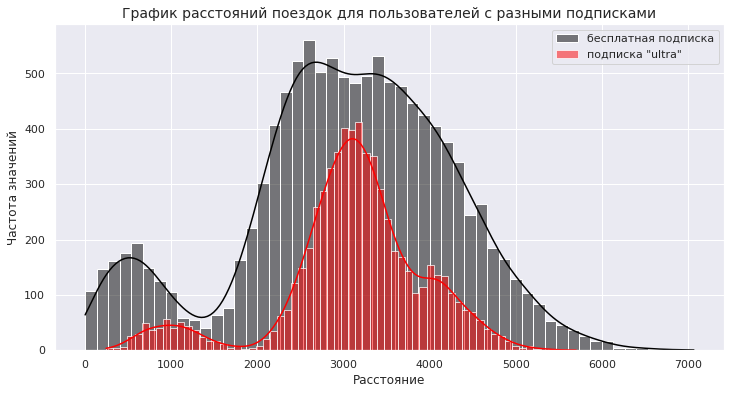

In [61]:
# Визуализация расстояний поездок
fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(data=users_free['distance'], ax=ax, color='black', fill=True, label='бесплатная подписка', kde=True)
sns.histplot(data=users_ultra['distance'], ax=ax, color='red', fill=True, label='подписка "ultra"', kde=True)

plt.title('График расстояний поездок для пользователей с разными подписками', fontsize = 14)
plt.legend()
plt.ylabel('Частота значений', fontsize = 12)
plt.xlabel('Расстояние', fontsize = 12)
plt.show();

In [62]:
users_free['duration'].describe()

count   11,473.00
mean        17.53
std          6.16
min          2.04
25%         13.09
50%         17.38
75%         21.64
max         34.95
Name: duration, dtype: float64

In [63]:
users_ultra['duration'].describe()

count   6,500.00
mean       18.54
std         5.57
min         3.76
25%        14.52
50%        18.18
75%        21.88
max        40.82
Name: duration, dtype: float64

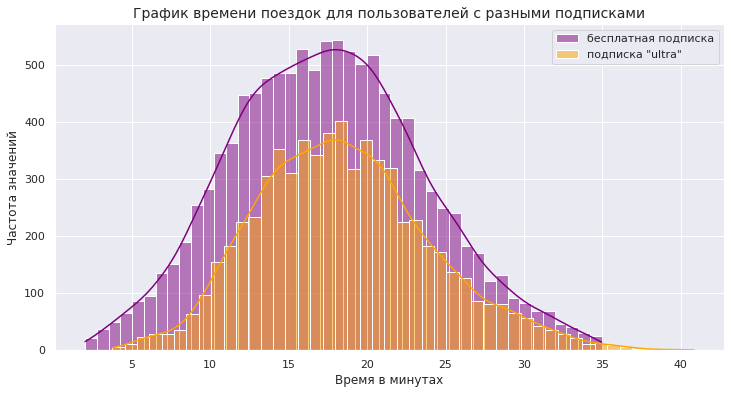

In [64]:
# Визуализация времени поездок
fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(data=users_free['duration'], ax=ax, color='purple', fill=True, label='бесплатная подписка', kde=True)
sns.histplot(data=users_ultra['duration'], ax=ax, color='orange', fill=True, label='подписка "ultra"', kde=True)

plt.title('График времени поездок для пользователей с разными подписками', fontsize = 14)
plt.legend()
plt.ylabel('Частота значений', fontsize = 12)
plt.xlabel('Время в минутах', fontsize = 12)
plt.show();

In [65]:
users_free['distance'].describe()

count   11,473.00
mean     3,028.37
std      1,235.54
min          0.86
25%      2,360.88
50%      3,102.08
75%      3,883.98
max      7,066.00
Name: distance, dtype: float64

In [66]:
users_ultra['distance'].describe()

count   6,500.00
mean    3,115.45
std       836.90
min       244.21
25%     2,785.44
50%     3,148.64
75%     3,560.57
max     5,699.77
Name: distance, dtype: float64

##### Вывод по разделу

В этом разделе проекта мы объединили все датафреймы в один, а затем создали два новых датафрейма: один для пользователей с подпиской «ультра» и другой для пользователей с бесплатной подпиской. Затем мы построили графики расстояний и времени поездок для каждой из этих категорий подписок.

#### Шаг 5. Подсчёт выручки

In [67]:
rides['duration'].sum()

321653.4423251829

In [68]:
merged_df['duration']

0       25.60
1       15.82
2        6.23
3       18.51
4       26.27
         ... 
17968   19.82
17969   21.41
17970   18.44
17971   16.67
17972   15.89
Name: duration, Length: 17973, dtype: float64

In [69]:
# Округляем продолжительность поездок
merged_df['duration'] = np.ceil(merged_df['duration'])

In [70]:
merged_df['duration'].sum()

330613.0

In [71]:
merged_df['duration']

0       26.00
1       16.00
2        7.00
3       19.00
4       27.00
         ... 
17968   20.00
17969   22.00
17970   19.00
17971   17.00
17972   16.00
Name: duration, Length: 17973, dtype: float64

In [72]:
# Группируем данные по уникальному номеру пользователя и месяцу, рассчитываем суммарные дистанции, время и количество поездок
pivot_1 = merged_df.pivot_table(index=['user_id', 'month'], values = ['distance','duration'],
                              aggfunc={'distance' : ['sum','count'],'duration' : 'sum',})
pivot_1.columns=['count','distanse','duration']
pivot_1

count  distanse  duration
user_id month                           
1       1          2  7,027.51     42.00
        4          1    754.16      7.00
        8          2  6,723.47     46.00
        10         2  5,809.91     32.00
        11         3  7,003.50     56.00
...              ...       ...       ...
1534    6          2  3,409.47     26.00
        8          2  7,622.45     48.00
        9          1  4,928.17     23.00
        11         4 13,350.02     78.00
        12         1  2,371.71     16.00

[11300 rows x 3 columns]

In [73]:
# Проверяем данные на наличие пропущенных значений после объединения
print(f'\033[1mПроверка наличия пропущенных значений в датафрейме pivot_1:\033[0m\n{pivot_1.isna().sum()}')


Проверка наличия пропущенных значений в датафрейме pivot_1:
count       0
distanse    0
duration    0
dtype: int64


In [74]:
# Создаем еще одну сводную таблицу, сгруппированную по индентификатору и месяцу, добавляем нужные столбцы
pivot_2 = merged_df.pivot_table(index=['user_id', 'month'], 
                                values = ['start_ride_price','minute_price','subscription_fee'])
pivot_2

minute_price  start_ride_price  subscription_fee
user_id month                                                  
1       1                 6                 0               199
        4                 6                 0               199
        8                 6                 0               199
        10                6                 0               199
        11                6                 0               199
...                     ...               ...               ...
1534    6                 8                50                 0
        8                 8                50                 0
        9                 8                50                 0
        11                8                50                 0
        12                8                50                 0

[11300 rows x 3 columns]

In [75]:
# Проверяем данные на наличие пропущенных значений после объединения
print(f'\033[1mПроверка наличия пропущенных значений в датафрейме pivot_2:\033[0m\n{pivot_2.isna().sum()}')

Проверка наличия пропущенных значений в датафрейме pivot_2:
minute_price        0
start_ride_price    0
subscription_fee    0
dtype: int64


In [76]:
# Объединяем датафреймы 
pivot = pivot_1.merge(pivot_2, on=['user_id','month'], how='outer')
# Рассчитываем помесячную выручку от каждого из пользователей
pivot['revenue_per_month'] = (pivot['start_ride_price'] * pivot['count'] 
                              + pivot['minute_price'] * pivot['duration'] + pivot['subscription_fee'])
pivot

count  distanse  duration  minute_price  start_ride_price  \
user_id month                                                              
1       1          2  7,027.51     42.00             6                 0   
        4          1    754.16      7.00             6                 0   
        8          2  6,723.47     46.00             6                 0   
        10         2  5,809.91     32.00             6                 0   
        11         3  7,003.50     56.00             6                 0   
...              ...       ...       ...           ...               ...   
1534    6          2  3,409.47     26.00             8                50   
        8          2  7,622.45     48.00             8                50   
        9          1  4,928.17     23.00             8                50   
        11         4 13,350.02     78.00             8                50   
        12         1  2,371.71     16.00             8                50   

               subscription_fee  revenue_per_month  
user_id month                                       
1       1                   199             451.00  
        4                   199             241.00  
        8                   199             475.00  
        10                  199             391.00  
        11                  199             535.00  
...                         ...                ...  
1534    6                     0             308.00  
        8                     0             484.00  
        9                     0             234.00  
        11                    0             824.00  
        12                    0             178.00  

[11300 rows x 7 columns]

In [77]:
# Проверяем данные на наличие пропущенных значений после объединения
print(f'\033[1mПроверка наличия пропущенных значений в датафрейме pivot:\033[0m\n{pivot.isna().sum()}')

Проверка наличия пропущенных значений в датафрейме pivot:
count                0
distanse             0
duration             0
minute_price         0
start_ride_price     0
subscription_fee     0
revenue_per_month    0
dtype: int64


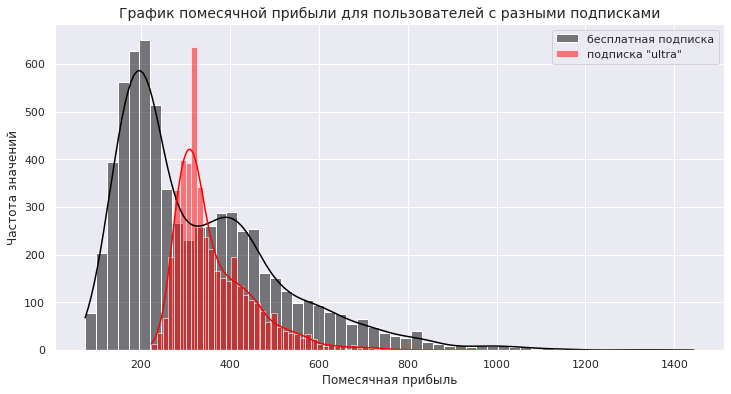

In [78]:
# Визуализация расстояний поездок
fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(data=pivot.query('subscription_fee == 0')['revenue_per_month'], 
             ax=ax, color='black', fill=True, label='бесплатная подписка', kde=True)
sns.histplot(data=pivot.query('subscription_fee == 199')['revenue_per_month'], 
             ax=ax, color='red', fill=True, label='подписка "ultra"', kde=True)

plt.title('График помесячной прибыли для пользователей с разными подписками', fontsize = 14)
plt.legend()
plt.ylabel('Частота значений', fontsize = 12)
plt.xlabel('Помесячная прибыль', fontsize = 12)
plt.show();

In [79]:
pivot.query('subscription_fee == 0')['revenue_per_month'].median()

274.0

In [80]:
pivot.query('subscription_fee == 199')['revenue_per_month'].median()

337.0

In [81]:
pivot.query('subscription_fee == 0')['revenue_per_month'].sum()

2228594.0

In [82]:
pivot.query('subscription_fee == 199')['revenue_per_month'].sum()

1644537.0

##### Вывод по разделу

Создали новый датафрейм, содержащий агрегированные данные по идентификатору пользователя и месяцу. Посчитали суммарные расстояния и время поездок для каждого пользователя, а также общее количество поездок в месяц. Также добавили новый столбец с информацией о помесячной выручке, которую принес каждый из пользователей.

In [83]:
pivot['revenue_per_month'].sum()

3873131.0

#### Шаг 6. Проверка гипотез

##### Гипотеза №1

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

**Гипотеза H0**: Пользователи с подпиской и без в среднем тратят одинаковое количество времени на поездки. \
**Гипотеза H1**: Пользователи с подпиской в среднем тратят больше времени на поездки, чем пользователи без.

In [84]:
# Рассчитываем значение p-value для гипотезы
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind( 
    users_ultra['duration'],
    users_free['duration'],
    alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.704468074453899e-28
Отвергаем нулевую гипотезу


**Вывод:** Мы получили очень маленькое p-value, что говорит нам о том, что вероятность получить значение, которое близко к среднему для нулевой гипотезы очень мало, поэтому мы можем отвергнуть нулевую гипотезу и не отвергнуть альтернативную.
Похоже, что пользователи с подпиской в среднем и правда тратят больше времени на поездки, по сравнению с пользователями без подписки, такую гипотезу мы не отвергаем.

Для бизнеса это, безусловно, хорошая новость. Такой результат говорит о том, что большинство пользователей с подпиской используют самокаты в качестве регулярного средства передвижения. Следовательно, бизнес может как минимум рассчитывать на минимальный доход от таких пользователей в виде стоимости ежемесячной подписки.

In [85]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


##### Гипотеза №2

Расстояние одной поездки в 3130 — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

**Гипотеза H0**: Среднее расстояние, которое проезжают пользователи равно 3130 метров. \
**Гипотеза H1**: Среднее расстояние, которое проезжают пользователи больше 3130 метров.

In [86]:
# Рассчитываем значение p-value для гипотезы
alpha = 0.01 # уровень статистической значимости

results = st.ttest_1samp( 
    users_ultra['distance'],
    3130,
    alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Нулевую гипотезу отвергнуть не удалось, так как значение вероятности больше уровня статистической значимости, можно сказать, что гипотеза о том, что пользователи в среднем не доходят до полного износа самокатов вполне жизнеспособна.

Такой результат может помочь бизнесу более грамотно планировать замену самокатов, а также сэкономить на их ремонтах.

##### Гипотеза №3

Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

**Гипотеза H0:** Помесячная выручка от пользователей с подпиской равна выручке от пользователей без подписки. \
**Гипотеза H1:** Помесячная выручка от пользователей с подпиской выше выручку от пользователей без подписки.

In [87]:
# Рассчитываем значение p-value для гипотезы
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind( 
    pivot.query('subscription_fee == 199')['revenue_per_month'],
    pivot.query('subscription_fee == 0')['revenue_per_month'],
    alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.0314113674863288e-30
Отвергаем нулевую гипотезу


По результатам проверки видим крайне маленькую вероятность нулевой гипотезы, следователь, отвергаем ее в пользу альтернативной, можно сказать, что  помесячная выручка от пользователей с подпиской превышает выручку от пользователей без подписки, в предыдущем разделе мы как раз пронаблюдали эту картину, хоть пользователей с подпиской и меньше, но прибыль от них выше.

Такой результат показывает, что стоит больше стимулировать людей покупать подписку, чтобы она становилась более привлекательной для пользователей, например, использую различные промоакции, но важно следить, чтобы это не влияло на общую прибыль.

##### Гипотеза №4

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

В данном случае, для проверки того, как повлияло обновление сервиса на количество обращений в техподдержку, стоит проверять гипотезу о равенстве средних для зависимых выборок, то есть брать выборку по обращениям до и после внесения изменений.
При этом гипотезы будут выглядеть следующим образом:

**Гипотеза H0:** Среднее количество обращений в техподдержку до обновления равно количеству обращений после обновления. \
**Гипотеза H1:** Среднее количество обращений в техподдержку после обновления меньше, чем до.

Для решения этой задачи в Python можно было бы воспользоваться функцией st.ttest_rel(before, after, alternative='greater'), где before -выборка до внесения изменений, а after - выборка после обновления приложения, при этом проверяем правостороннюю гипотезу.

##### Вывод по проверке гипотез:
В этом разделе мы рассмотрели и проверили ряд гипотез, которые могут помочь бизнесу лучше понять своих клиентов и увеличить выручку. На основе проверенных гипотез можно сделать следующие выводы:
- Пользователи с подпиской проводят больше времени в поездках, чем те, кто используют бесплатную подписку, скорее всего, пользователи с подпиской пользуются сервисом достаточно регулярно, поэтому считают, что платная подписка для них выгоднее.
- Среднее расстояние, которое в среднем проезжают пользователи за одну поездку, меньше примерной величины износа самоката в 3130 метров.
- Как мы и увидели в предыдущем разделе, помесячная выручка от пользователей с подпиской выше, чем пользователей без подписки. Следовательно, имеет смысл разработать варианты стимулирования пользователей к переходу на платную подписку, чтобы она становилась более привлекательной для пользователей. \

Что касается проверки изменения количества обращений в техподдержку после обновления сервиса, то для проверки нулевой и альтернативной гипотез, необходимо произвести анализ выборок до и после обновления, а с помощью функции st.ttest_rel произвести расчет p-value и определить стоит ли отвергать гипотезу или нет.


#### Общий вывод
В ходе данного исследования мы исследовали три датасета с данными, полученные от сервиса аренды самокатов GoFast. В первую очередь мы загрузили данные и упаковали их в датафреймы, проанализировали и просмотрели необходимую информацию, которую будем использовать в проекте.

Получили три датафрейма со следующими параметрами:

***Users:***

**user_id** - уникальный идентификатор пользователя \
**name** - имя пользователя \
**age** - возраст \
**city** - город \
**subscription_type** - тип подписки (free, ultra)

***Rides:***

**user_id**	- уникальный идентификатор пользователя \
**distance** - расстояние, которое пользователь проехал в текущей сессии (в метрах) \
**duration** - продолжительность сессии (в минутах) — время с того момента, \
как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку» \
**date** - дата совершения поездки

***Subs:***

**subscription_type** - тип подписки \
**minute_price** - стоимость одной минуты поездки по данной подписке \
**start_ride_price** - стоимость начала поездки \
**subscription_fee** - стоимость ежемесячного платежа \

Следующим шагом нашей работы стала предобработка данных. Мы тщательно проверили типы данных столбцов в датафреймах и, при необходимости, изменили их для более удобного анализа. Кроме того, мы создали столбец с номером месяца для каждой поездки.

Просмотрев датафреймы, мы убедились, что данные поступили в очень хорошем виде и не имели пропущенных значений. Также мы проверили данные на наличие явных и неявных дубликатов, обнаружили около 2% явных дубликатов в датафрейме USERS, которые решили удалить, после чего данные были полностью подготовлены для анализа.

Далее, мы провели исследовательский анализ различных данных в датафреймах. Узнали, что в датасете присутствуют данные по 8 городам России, больше всего сервисом пользовались пользователи, проживающие в Пятегорске, меньше всего - в Москве.
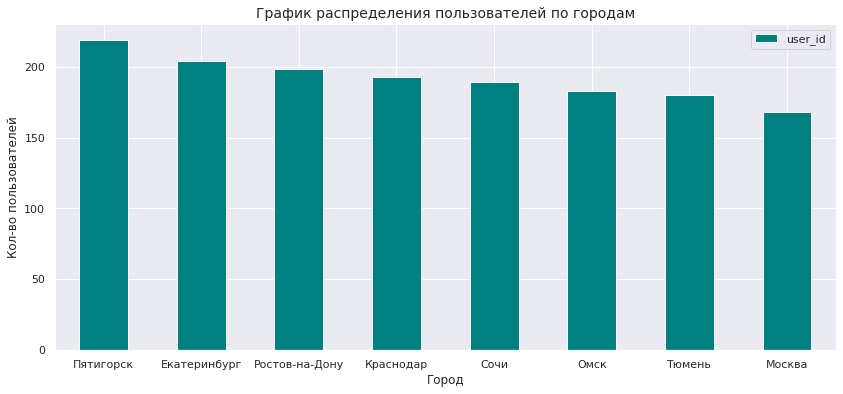
Определили, что в основном сервисом пользуются молодые люди, средний возраст которых составляет 25 лет. Возраст самого молодого пользователя - 12 лет, самого старшего - 45 лет.
Определили соотношение пользователей, которые пользуются бесплатной подпиской и подпиской "ультра", 54.4% против 45.6% соответсвенно.
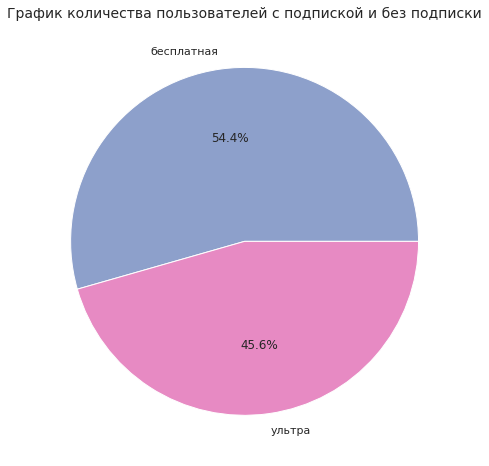

В дополнение к этому, мы изучили расстояние и продолжительность поездок пользователей. Минимальное расстояние поездки составило около 1 метра, а максимальное преодоленное расстояние одним пользователем — 7211 метров. Среднее и медианное время поездок, как и в случае с расстоянием, оказались очень близкими и находятся в районе 17,7 минут. Максимальное время поездки пользователя составило 40 минут. Что касается минимального времени, мы обнаружили аномальное значение в 30 секунд, которое было зафиксировано у 95 записей поездок. Мы отфильтровали это значение, посчитав его явным выбросом.

Для дальнешего анализа, нам понадобилось объединить все датафреймы в один, а затем создать два новых датафрейма: один для пользователей с подпиской «ультра» и другой для пользователей с бесплатной подпиской. Затем мы построили графики расстояний по группам пользователей.
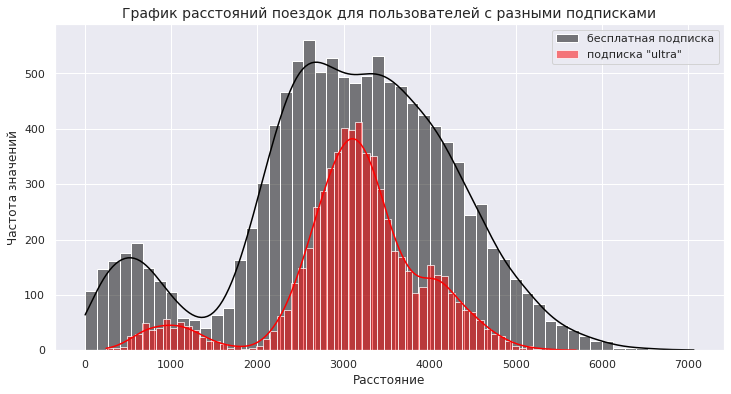
И графики соотношения времени поездок пользоавательй с бесплатной подпиской и подпиской "ультра".
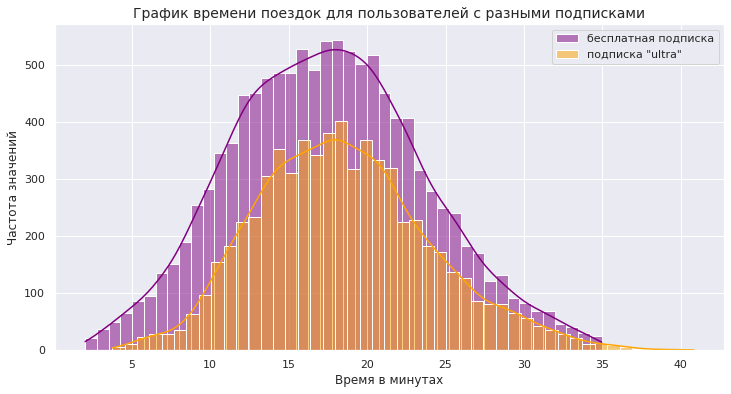

В 5 разделе нашего проекта, мы создали новый датафрейм, содержащий агрегированные данные по идентификатору пользователя и месяцу, посчитали суммарные расстояния и время поездок для каждого пользователя, а также общее количество поездок в месяц. Также добавили новый столбец с информацией о помесячной выручке, которую принес каждый из пользователей, визуально сравнили данные по помесячной выручке. Выяснили, что за календарный год сервису удалось заработать на пользователях с подпиской около 1 млн.645 тыс. рублей, а на пользователях без подписки около 2 млн. 229 тыс. рублей. Что касается помесячной выручки, то в среднем, клиент с подпиской приносит доход в 337 рублей в месяц, а пользователь без подписки 274 рубля. 
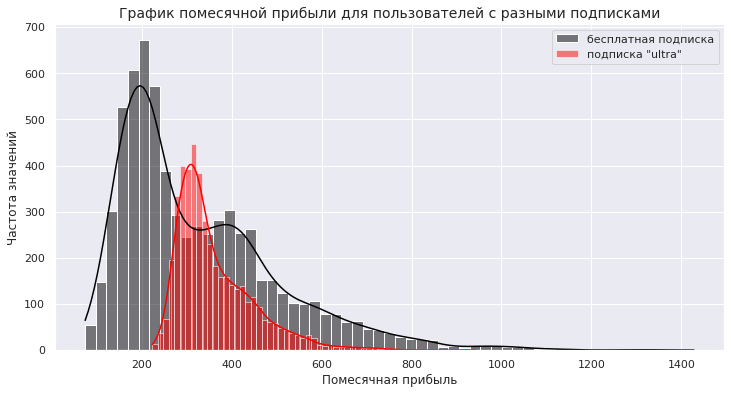

Важным разделом проекта была проверка ряда гипотез, которые могут помочь бизнесу. На основе составленных нулевых и альтернативных гипотез, мы сделали следующие выводы:
Важным разделом нашего проекта была проверка ряда гипотез, которые могут помочь бизнесу. На основе составленных нулевой и альтернативной гипотез, мы пришли к следующим выводам:

1. Пользователи с подпиской проводят больше времени в поездках по сравнению с клиентами, имеющими бесплатную подписку. Скорее всего, пользователи с подпиской используют сервис достаточно регулярно, поэтому считают, что платная подписка для них выгоднее.

2. Среднее расстояние, которое в среднем проезжают пользователи за одну поездку, меньше примерной величины износа самоката, которая составляет 3130 метров.

3. Как показало исследование, помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки. Имеет смысл рассмотреть варианты стимулирования к переходу на платную подписку. 

Что касается проверки изменения количества обращений в техподдержку после обновления сервиса, то для проверки нулевой и альтернативной гипотез необходимо проанализировать выборки до и после обновления. С помощью функции st.ttest_rel можно рассчитать p-value и определить, стоит ли отвергать гипотезу.

Таким образом, бизнесу можно порекомендовать следующее:
- Постараться увеличить количество клиентов с платной подпиской, например, можно использовать различные промоакции или добавить в подписку скидку на сторонние услуги, в партнерстве с каким нибудь другим сервисом. Таким образом получится увеличить как общую прибыль, так и легче прогнозировать будущую вырочку.
- Стоит подумать над оптимизацией количества ремонтов и замены самокатов, немного снизить их количество.
- Подумать над разработкой сетки из нескольких подписок, например, подписку по категориям: для студентов или семейную на несколько человек, или по фиксированным значениям времени и расстояния поездок.
- Проанализировать и выявить наиболее частые точки притяжения людей, оптимизировать количество самокатах на разных стоянках, в зависимости от средней загруженности локации.